#### Passive Land Mines Detection and Classification Method with Hybrid Machine-Learning Models.

* Land mines can be detected with high precision active detectors. However, the principle of active detectors involves sending electrical signals to the environment which could trigger mine blasting, cause mine explosion and lead to horrific dangers. 
* To prevent this deadly occurence from active detectors, passive land mine detectors were introduced/used. Passive mine detectors, though less dangerous as active detectors, have some limitations. 
* In this project, we will eliminate the handicaps of passive mine detectors with machine learning techniques. The data for this project is measured under different conditions(features) to classify different types of mines detected. 

#### The land-mine dataset variables are defined below:

* V -> output voltage of sensor due to magnetic distortion
* H -> height of the sensor from the ground
* S -> 6 different soil types depending on moisture condition: 0.0-(Dry & Sandy), 0.2-(Dry & Humus), 0.4-(Dry & Limy), 0.6-(Humid & Sandy), 0.8-(Humid & Humus), 1.0-(Humid & Limy).
* M -> 5 different land-mine types: 0(Null), 1(Anti-Tank), 2(Anti-Personnel), 3(Booby Trapped Anti-Personnel), 4(M14 Anti-Personnel)

### Data Preparation and Preprocessing

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read the data and get samples of the data
df = pd.read_csv("Mine_Dataset.csv")
df.sample(10)

,V,H,S,M
203,0.419184,0.090909,0.8,5
278,0.356072,0.818182,0.6,3
144,0.362537,0.909091,0.0,4
79,0.999999,0.181818,0.4,2
39,0.308157,1.000000,0.4,1
211,0.471299,0.181818,0.4,5
184,0.277945,0.272727,0.0,5
223,0.350453,0.818182,1.0,5
220,0.371601,0.363636,1.0,5
50,0.906343,0.363636,0.0,2


In [3]:
# rename the columns
df = df.rename(
    columns={"V": "voltage", "H": "height", "S": "soil_types", "M": "mine_types"}
)
df.head()

,voltage,height,soil_types,mine_types
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [4]:
# check missing data in the dataframe
df.isnull().sum()

voltage       0
height        0
soil_types    0
mine_types    0
dtype: int64

In [5]:
# full information about our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   voltage     338 non-null    float64
 1   height      338 non-null    float64
 2   soil_types  338 non-null    float64
 3   mine_types  338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB


In [6]:
# statistical data of the dataframe
df.describe()

,voltage,height,soil_types,mine_types
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


In [7]:
# Unique values of mine types and soil types in the dataframe
df["mine_types"] = df["mine_types"].replace({1: 0, 2: 1, 3: 2, 4: 3, 5: 4})
df["mine_types"].value_counts(), df["soil_types"].value_counts()

(mine_types
 0    71
 1    70
 2    66
 3    66
 4    65
 Name: count, dtype: int64,
 soil_types
 0.0    59
 0.8    58
 0.6    57
 1.0    57
 0.4    56
 0.2    51
 Name: count, dtype: int64)

### Data Visualization and Interpretation

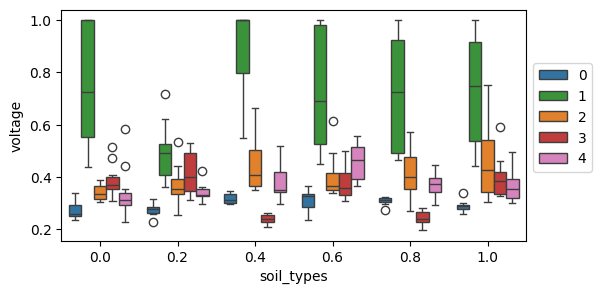

In [8]:
plt.figure(figsize=(6, 3))
palette = {0: "tab:blue", 1: "tab:green", 2: "tab:orange", 3: "tab:red", 4: "tab:pink"}
sns.boxplot(data=df, x="soil_types", y="voltage", hue="mine_types", palette=palette)
plt.legend(bbox_to_anchor=(1, 0.8))

* ##### The boxplot above indicates Anti-Tank land mines has the highest voltage on all soil types.

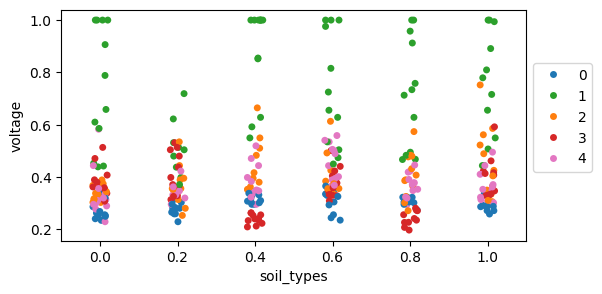

In [9]:
plt.figure(figsize=(6, 3))
sns.stripplot(
    data=df, x="soil_types", y="voltage", hue="mine_types", jitter=True, palette=palette
)
plt.legend(bbox_to_anchor=(1, 0.8))

##### Removing Outliers from the dataframe

In [10]:
# df greater than 25%
Q1 = df.quantile(0.25)
Q1

voltage       0.309737
height        0.272727
soil_types    0.200000
mine_types    1.000000
Name: 0.25, dtype: float64

In [11]:
# df less than 75%
Q3 = df.quantile(0.75)
Q3

voltage       0.482628
height        0.727273
soil_types    0.800000
mine_types    3.000000
Name: 0.75, dtype: float64

In [12]:
# Inter-quantile range
IQR = Q3 - Q1
IQR

voltage       0.172891
height        0.454545
soil_types    0.600000
mine_types    2.000000
dtype: float64

In [13]:
# removed outliers reduced entries from 338 to 306
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   voltage     306 non-null    float64
 1   height      306 non-null    float64
 2   soil_types  306 non-null    float64
 3   mine_types  306 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 12.0 KB


##### get both categorical and numerical variables from the dataframe columns

In [14]:
df.columns

Index(['voltage', 'height', 'soil_types', 'mine_types'], dtype='object')

In [15]:
num_variables = ["voltage", "height"]
cat_variable = ["soil_types"]

In [16]:
# convert the categorical variable from float to string dtypes
df[cat_variable] = df[cat_variable].astype(str)
df[cat_variable].dtypes

soil_types    object
dtype: object

In [17]:
df[num_variables].dtypes

voltage    float64
height     float64
dtype: object

#### Setting Up The Validation Framework

In [18]:
# import train_test split from scikit-learn
from sklearn.model_selection import train_test_split

In [19]:
# Get Test data:  test_size=0.2, which is the 20% of full dataset
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [20]:
# length of split dataset
len(df_full_train), len(df_test)

(244, 62)

In [21]:
# get the train_test and validation_test: 20% of df_val of the 80% of df_train = 0.25 == 20/80 == 1/4
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [22]:
# actual lengths of each split dataframes
len(df_train), len(df_val), len(df_test)

(183, 61, 62)

In [23]:
# shuffle the indexes of each dataframe
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [24]:
# target values for each dataframe in numpy array
y_train = df_train["mine_types"].values
y_val = df_val["mine_types"].values
y_test = df_test["mine_types"].values

In [25]:
# delete target variable
del df_train["mine_types"]
del df_val["mine_types"]
del df_test["mine_types"]

In [26]:
# Explore df_full_train
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.isnull().sum()

voltage       0
height        0
soil_types    0
mine_types    0
dtype: int64

In [27]:
df_full_train["mine_types"].value_counts(), df_full_train["mine_types"].value_counts(
    normalize=True
)

(mine_types
 0    59
 3    57
 4    49
 2    49
 1    30
 Name: count, dtype: int64,
 mine_types
 0    0.241803
 3    0.233607
 4    0.200820
 2    0.200820
 1    0.122951
 Name: proportion, dtype: float64)

#### Feature Importance/Correlation

In [28]:
corr = df_full_train[cat_variable + num_variables].corrwith(df_full_train["mine_types"])
corr.sort_values(ascending=False)

voltage       0.084134
soil_types    0.003797
height       -0.034109
dtype: float64

#### One Hot Encoding with Dictvectorizer

In [29]:
from sklearn.feature_extraction import DictVectorizer

In [30]:
dv = DictVectorizer(sparse=False)

In [31]:
# convert train data to dictionary
train_dicts = df_train[cat_variable + num_variables].to_dict(orient="records")

In [32]:
# the feature matrix for the training dataset
X_train = dv.fit_transform(train_dicts)

In [33]:
dv.get_feature_names_out()

array(['height', 'soil_types=0.0', 'soil_types=0.2', 'soil_types=0.4',
       'soil_types=0.6', 'soil_types=0.8', 'soil_types=1.0', 'voltage'],
      dtype=object)

In [34]:
# convert validation data to dictionary
val_dicts = df_val[cat_variable + num_variables].to_dict(orient="records")

In [35]:
# the feature matrix for the training dataset
X_val = dv.transform(val_dicts)

### Using Different ML Hybrid Models for multi-class target(Mine_types)

#### 1. Random Forest

* ##### RF without hyperparamter tuning

In [36]:
# Random Forest Model, Hyperparamter tuning and Evaluation Metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [37]:
# Estimator object of the algorithm
model_RF = RandomForestClassifier()

In [38]:
# Training the model
model_RF.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
# Prediction without any parameter tuning
y_pred = model_RF.predict(X_val)
y_pred

array([1, 0, 0, 2, 4, 0, 2, 3, 2, 3, 0, 2, 3, 3, 3, 4, 3, 4, 1, 0, 0, 3,
       0, 1, 2, 0, 3, 1, 0, 1, 3, 4, 2, 3, 0, 0, 2, 2, 0, 2, 4, 2, 3, 2,
       3, 0, 0, 0, 0, 1, 0, 3, 0, 0, 2, 3, 0, 0, 0, 0, 3])

In [40]:
# calling y_val
y_val

array([1, 0, 0, 2, 3, 0, 4, 0, 4, 3, 0, 1, 4, 3, 2, 2, 3, 4, 1, 2, 0, 0,
       0, 1, 4, 3, 2, 1, 0, 1, 4, 2, 1, 3, 0, 2, 2, 4, 0, 4, 0, 2, 2, 4,
       3, 0, 4, 2, 4, 1, 4, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3])

In [41]:
# Evaluate the model_RF without hyperparamter tuning
accuracy = (y_val == y_pred).mean()
print(f"Model_RF accuracy: {accuracy}")

Model_RF accuracy: 0.5245901639344263


In [42]:
# Evaluation function of auc_score for individual target


def roc_auc_score_multiclass(actual_class, pred_class, average="macro"):

    # creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:

        # creating a list of all the classes except the current class
        other_class = [x for x in unique_class if x != per_class]

        # marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        # using scikit-learn method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average=average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

In [43]:
# roc_auc_score of individual mine-types without tuned RF selected parameters
roc_auc_score_RF = roc_auc_score_multiclass(y_val, y_pred)
print(f"Model_RF roc_auc_score : {roc_auc_score_RF}")

Model_RF roc_auc_score : {0: 0.8094919786096256, 1: 0.875, 2: 0.5463636363636364, 3: 0.734775641025641, 4: 0.5008503401360543}


#### Hyperparameter tuning of Random Forest Classifier:

* ##### Randomized search RF hyperparameter tuning

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
%%time

# randomly selected hyperparamters for tuning the RF model
RF_params_grid = {
    "n_estimators": range(1, 10),
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": range(1, 10),
    "min_samples_split": np.linspace(0.1, 0.5),
    "min_samples_leaf": np.linspace(0.1, 0.5),
    "min_weight_fraction_leaf": np.linspace(0.1, 0.5),
    "max_features": ["sqrt", "log2"],
    "min_impurity_decrease": np.linspace(0.1, 0.5),
    "random_state": range(1, 6),
    "verbose": range(1, 6),
    "class_weight": ["balanced", "balanced_subsample"],
    "ccp_alpha": np.linspace(0.1, 0.5),
    "bootstrap": [True, False],
    "warm_start": [True, False],
    "oob_score": [True, False],
}

CPU times: user 434 μs, sys: 181 μs, total: 615 μs
Wall time: 667 μs


In [54]:
# estimator object of the RF tuning algorithm
model_RF1 = RandomizedSearchCV(estimator=model_RF, param_distributions=RF_params_grid)

In [55]:
# Training the Randomized search RF algorithm
model_RF1.fit(X_train, y_train)

building tree 1 of 9
building tree 2 of 9
building tree 3 of 9
building tree 4 of 9
building tree 5 of 9
building tree 6 of 9
building tree 7 of 9
building tree 8 of 9
building tree 9 of 9
building tree 1 of 9
building tree 2 of 9
building tree 3 of 9
building tree 4 of 9
building tree 5 of 9
building tree 6 of 9
building tree 7 of 9
building tree 8 of 9
building tree 9 of 9
building tree 1 of 9
building tree 2 of 9
building tree 3 of 9
building tree 4 of 9
building tree 5 of 9
building tree 6 of 9
building tree 7 of 9
building tree 8 of 9
building tree 9 of 9
building tree 1 of 9
building tree 2 of 9
building tree 3 of 9
building tree 4 of 9
building tree 5 of 9
building tree 6 of 9
building tree 7 of 9
building tree 8 of 9
building tree 9 of 9
building tree 1 of 9
building tree 2 of 9
building tree 3 of 9
building tree 4 of 9
building tree 5 of 9
building tree 6 of 9
building tree 7 of 9
building tree 8 of 9
building tree 9 of 9
building tree 1 of 8
building tree 2 of 8
building tree

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start i

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': array([0.1       , 0.10816327, 0.11632653, 0.1244898 , 0.13265306,
       0.14081633, 0.14897959, 0.15714286, 0.16530612, 0.17346939,
       0.18163265, 0.18979592, 0.19795918, 0.20612245, 0.21428571,
       0.22244898, 0.23061224, 0.23877551, 0.24693878, 0.25510204,
       0.26326531, 0.271428...
       0.30408163, 0.3122449 , 0.32040816, 0.32857143, 0.33673469,
       0.34489796, 0.35306122, 0.36122449, 0.36938776, 0.37755102,
       0.38571429, 0.39387755, 0.40204082, 0.41020408, 0.41836735,
       0.42653061, 0.43469388, 0.44285714, 0.45102041, 0.45918367,
       0.46734694, 0.4755102 , 0.48367347, 0.49183673, 0.5       ]),
                                        'n_estimators': range(1, 10),
                                        'oob_score': [True, False],
                                        'random_state': range(1, 6),
                                        'verbose': range(1, 6),
                                        'warm_start': [True, False]})

In [56]:
# best estimators of Randomized RF Classifier
model_RF1.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.263265306122449,
                       class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features='log2',
                       min_impurity_decrease=0.3204081632653062,
                       min_samples_leaf=0.2469387755102041,
                       min_samples_split=0.2795918367346939,
                       min_weight_fraction_leaf=0.15714285714285714,
                       n_estimators=8, random_state=4, verbose=3)

In [57]:
# best params for Randomized search RF
RFCV_params = model_RF1.best_params_
RFCV_params

{'warm_start': False,
 'verbose': 3,
 'random_state': 4,
 'oob_score': False,
 'n_estimators': 8,
 'min_weight_fraction_leaf': 0.15714285714285714,
 'min_samples_split': 0.2795918367346939,
 'min_samples_leaf': 0.2469387755102041,
 'min_impurity_decrease': 0.3204081632653062,
 'max_features': 'log2',
 'max_depth': 6,
 'criterion': 'entropy',
 'class_weight': 'balanced',
 'ccp_alpha': 0.263265306122449,
 'bootstrap': False}

In [58]:
# prediction with the randomized search parameter-tuned RF model
y_pred1 = model_RF1.predict(X_val)
y_pred1

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [59]:
y_val

array([1, 0, 0, 2, 3, 0, 4, 0, 4, 3, 0, 1, 4, 3, 2, 2, 3, 4, 1, 2, 0, 0,
       0, 1, 4, 3, 2, 1, 0, 1, 4, 2, 1, 3, 0, 2, 2, 4, 0, 4, 0, 2, 2, 4,
       3, 0, 4, 2, 4, 1, 4, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3])

In [60]:
# Evaluate the randomized search tuned model_RFCV
accuracy = (y_val == y_pred1).mean()
print(f"Model_RF1 accuracy: {accuracy}")

Model_RF1 accuracy: 0.4098360655737705


In [61]:
# roc_auc_score of individual mine-types target of randomized search RF hyperparameters
roc_auc_score_RF1 = roc_auc_score_multiclass(y_val, y_pred1)
print(f"Model_RF1 roc_auc_score : {roc_auc_score_RF1}")

Model_RF1 roc_auc_score : {0: 0.7840909090909091, 1: 0.839622641509434, 2: 0.5, 3: 0.5, 4: 0.5}


* ##### RF hyperopt hyperparameters tuning

In [62]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score

In [63]:
# define objective function
def objective(params):
    RF_HYP = RandomForestClassifier(**params)
    accuracy = cross_val_score(RF_HYP, X_train, y_train, cv=5).mean()
    return {"loss": -accuracy, "status": STATUS_OK}

In [64]:
# Define the hyperparameter space for RF
space = {
    "n_estimators": hp.choice("n_estimators", range(1, 10)),
    "max_depth": hp.choice("max_depth", range(1, 10)),
    "min_samples_split": hp.uniform("min_samples_split", 0.1, 0.5),
    "min_samples_leaf": hp.uniform("min_samples_leaf", 0.1, 0.5),
    "criterion": hp.choice("criterion", ["gini", "entropy", "log_loss"]),
    "min_weight_fraction_leaf": hp.uniform("min_weight_fraction_leaf", 0.1, 0.5),
    "max_features": hp.choice("max_features", ["sqrt", "log2"]),
    "min_impurity_decrease": hp.uniform("min_impurity_decrease", 0.1, 0.5),
    "random_state": hp.choice("random_state", range(1, 6)),
    "verbose": hp.choice("verbose", range(1, 6)),
    "class_weight": hp.choice("class_weight", ["balanced", "balanced_subsample"]),
    "ccp_alpha": hp.uniform("ccp_alpha", 0.1, 0.5),
    "warm_start": hp.choice("warm_start", [True, False]),
    "oob_score": hp.choice("oob_score", [True, False]),
}

In [65]:
%%time

# Run the optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20, trials=trials)

building tree 1 of 7                                                                                                                                          
building tree 2 of 7                                                                                                                                          
building tree 3 of 7                                                                                                                                          
building tree 4 of 7                                                                                                                                          
building tree 5 of 7                                                                                                                                          
building tree 6 of 7                                                                                                                                          
building tree 7 of 7                          

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the cl

building tree 2 of 7                                                                                                                                          
building tree 3 of 7                                                                                                                                          
building tree 4 of 7                                                                                                                                          
building tree 5 of 7                                                                                                                                          
building tree 6 of 7                                                                                                                                          
building tree 7 of 7                                                                                                                                          
building tree 1 of 7                          

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the cl

building tree 1 of 4
building tree 2 of 4                                                                                                                                          
building tree 3 of 4                                                                                                                                          
building tree 4 of 4                                                                                                                                          
building tree 1 of 4                                                                                                                                          
building tree 2 of 4                                                                                                                                          
building tree 3 of 4                                                                                                                                          
building tree 4 of 4     

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute

building tree 5 of 5                                                                                                                                          
building tree 1 of 8                                                                                                                                          
building tree 2 of 8                                                                                                                                          
building tree 3 of 8                                                                                                                                          
building tree 4 of 8                                                                                                                                          
building tree 5 of 8                                                                                                                                          
building tree 6 of 8                          

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the cl

building tree 7 of 8                                                                                                                                          
building tree 8 of 8                                                                                                                                          
building tree 1 of 8                                                                                                                                          
building tree 2 of 8                                                                                                                                          
building tree 3 of 8                                                                                                                                          
building tree 4 of 8                                                                                                                                          
building tree 5 of 8                          

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the cl

building tree 2 of 8                                                                                                                                          
building tree 3 of 8                                                                                                                                          
building tree 4 of 8                                                                                                                                          
building tree 5 of 8                                                                                                                                          
building tree 6 of 8                                                                                                                                          
building tree 7 of 8                                                                                                                                          
building tree 8 of 8                          

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute

building tree 1 of 7                                                                                                                                          
building tree 2 of 7                                                                                                                                          
building tree 3 of 7                                                                                                                                          
building tree 4 of 7                                                                                                                                          
building tree 5 of 7                                                                                                                                          
building tree 6 of 7                                                                                                                                          
building tree 7 of 7                          

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute

building tree 1 of 7                                                                                                                                          
building tree 2 of 7                                                                                                                                          
building tree 3 of 7                                                                                                                                          
building tree 4 of 7                                                                                                                                          
building tree 5 of 7                                                                                                                                          
building tree 6 of 7                                                                                                                                          
building tree 7 of 7                          

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaco

building tree 3 of 7                                                                                                                                          
building tree 4 of 7                                                                                                                                          
building tree 5 of 7                                                                                                                                          
building tree 6 of 7                                                                                                                                          
building tree 7 of 7                                                                                                                                          
building tree 1 of 7                                                                                                                                          
building tree 2 of 7                          

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaco

building tree 1 of 2                                                                                                                                          
building tree 2 of 2                                                                                                                                          
building tree 1 of 2                                                                                                                                          
building tree 2 of 2                                                                                                                                          
building tree 1 of 2                                                                                                                                          
building tree 2 of 2                                                                                                                                          
building tree 1 of 2                          

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start

building tree 6 of 7                                                                                                                                          
building tree 7 of 7                                                                                                                                          
building tree 1 of 7                                                                                                                                          
building tree 2 of 7                                                                                                                                          
building tree 3 of 7                                                                                                                                          
building tree 4 of 7                                                                                                                                          
building tree 5 of 7                          

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute

building tree 2 of 6
building tree 3 of 6                                                                                                                                          
building tree 4 of 6                                                                                                                                          
building tree 5 of 6                                                                                                                                          
building tree 6 of 6                                                                                                                                          
building tree 1 of 6                                                                                                                                          
building tree 2 of 6                                                                                                                                          
building tree 3 of 6     

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start

building tree 1 of 7
building tree 2 of 7                                                                                                                                          
building tree 3 of 7                                                                                                                                          
building tree 4 of 7                                                                                                                                          
building tree 5 of 7                                                                                                                                          
building tree 6 of 7                                                                                                                                          
building tree 7 of 7                                                                                                                                          
building tree 1 of 7     

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaco

100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  6.22trial/s, best loss: -0.3165165165165166]
CPU times: user 2.65 s, sys: 868 ms, total: 3.52 s
Wall time: 3.23 s


/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



In [66]:
# Print the best hyperparameters
print("Best hyperparameters of hyperopt tuned RF found:")
print(best)

Best hyperparameters of hyperopt tuned RF found:
{'ccp_alpha': 0.21535412504112658, 'class_weight': 0, 'criterion': 1, 'max_depth': 5, 'max_features': 0, 'min_impurity_decrease': 0.25548911605478, 'min_samples_leaf': 0.19360587351564582, 'min_samples_split': 0.3211452385055329, 'min_weight_fraction_leaf': 0.11152458965629673, 'n_estimators': 6, 'oob_score': 1, 'random_state': 0, 'verbose': 2, 'warm_start': 1}


In [67]:
best

{'ccp_alpha': 0.21535412504112658,
 'class_weight': 0,
 'criterion': 1,
 'max_depth': 5,
 'max_features': 0,
 'min_impurity_decrease': 0.25548911605478,
 'min_samples_leaf': 0.19360587351564582,
 'min_samples_split': 0.3211452385055329,
 'min_weight_fraction_leaf': 0.11152458965629673,
 'n_estimators': 6,
 'oob_score': 1,
 'random_state': 0,
 'verbose': 2,
 'warm_start': 1}

In [68]:
# Map Hyperopt indices to actual values
RFHYP_best_params = {
    "n_estimators": best["n_estimators"],
    "max_depth": best["max_depth"],
    "min_samples_split": best["min_samples_split"],
    "min_samples_leaf": best["min_samples_leaf"],
    "max_features": ["sqrt", "log2"][best["max_features"]],
    "min_impurity_decrease": best["min_impurity_decrease"],
    "min_weight_fraction_leaf": best["min_weight_fraction_leaf"],
    "oob_score": [True, False][best["oob_score"]],
    "random_state": best["random_state"],
    "verbose": best["verbose"],
    "warm_start": [True, False][best["warm_start"]],
    "criterion": ["gini", "entropy", "log_loss"][best["criterion"]],
    "ccp_alpha": best["ccp_alpha"],
    "class_weight": ["balanced", "balanced_subsample"][best["class_weight"]],
}

In [69]:
# Fit the RF model with the best parameters
model_RF2 = RandomForestClassifier(**RFHYP_best_params)
model_RF2.fit(X_train, y_train)

building tree 1 of 6
building tree 2 of 6
building tree 3 of 6
building tree 4 of 6
building tree 5 of 6
building tree 6 of 6


RandomForestClassifier(ccp_alpha=0.21535412504112658, class_weight='balanced',
                       criterion='entropy', max_depth=5,
                       min_impurity_decrease=0.25548911605478,
                       min_samples_leaf=0.19360587351564582,
                       min_samples_split=0.3211452385055329,
                       min_weight_fraction_leaf=0.11152458965629673,
                       n_estimators=6, random_state=0, verbose=2)

In [70]:
# Make predictions with RF_HYP tuned parameters
y_pred2 = model_RF2.predict(X_val)
y_pred2

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [71]:
# Evaluate the model_RFHYP with hyperparamter tuned RF
accuracy = (y_val == y_pred2).mean()
print(f"Model_RF2 accuracy: {accuracy}")

Model_RF2 accuracy: 0.4098360655737705


In [72]:
# roc_auc_score of individual mine-types with hyperopt tuned RF selected parameters
roc_auc_score_RF2 = roc_auc_score_multiclass(y_val, y_pred2)
print(f"Model_RF2 roc_auc_score : {roc_auc_score_RF2}")

Model_RF2 roc_auc_score : {0: 0.7840909090909091, 1: 0.839622641509434, 2: 0.5, 3: 0.5, 4: 0.5}


#### 2. XGBoost

In [73]:
# import XGB
import xgboost as xgb

In [74]:
# set config for xgb boost
xgb.set_config(verbosity=0)

* ##### tuning XGBclassifier selected hyperparameters with randomized search from scikit-learn

In [75]:
model_xgb = xgb.XGBClassifier()

In [76]:
# randomly selected xgboost parameters
xgb_params_grid = {
    "n_estimators": range(5, 50, 5),
    "max_depth": range(1, 10),
    "learning_rate": np.linspace(0.01, 1),
    "subsample": np.linspace(0.01, 1),
    "colsample_bytree": np.linspace(0.01, 1),
    "gamma": np.linspace(0.01, 1),
    "reg_alpha": range(1, 10),
    "reg_lambda": range(1, 10),
    "min_child_weight": range(1, 10),
    "objective": ["multi:softmax"],
    "n_thread": range(1, 10),
    "silent": range(1, 10),
    "num_class": [5],
}

In [77]:
# XGBclassifier algorithm randomized search hyper-parameters tuning
model_xgb1 = RandomizedSearchCV(
    estimator=model_xgb, param_distributions=xgb_params_grid, error_score="raise"
)

In [78]:
# fit the randomized search XGBclassifier model
model_xgb1.fit(X_train, y_train)

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(error_score='raise',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=Non...
       0.31306122, 0.33326531, 0.35346939, 0.37367347, 0.39387755,
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.49489796,
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ])})

In [79]:
# best estimators of randomized search XGBClassifier model
model_xgb1.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8787755102040816, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.49489795918367346,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.11102040816326529,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=45, n_jobs=None, n_thread=8,
              num_class=5, ...)

In [80]:
# best tuned hyper parameters of XGBClassifier
xgbCV_params = model_xgb1.best_params_
xgbCV_params

{'subsample': 1.0,
 'silent': 2,
 'reg_lambda': 5,
 'reg_alpha': 2,
 'objective': 'multi:softmax',
 'num_class': 5,
 'n_thread': 8,
 'n_estimators': 45,
 'min_child_weight': 2,
 'max_depth': 5,
 'learning_rate': 0.11102040816326529,
 'gamma': 0.49489795918367346,
 'colsample_bytree': 0.8787755102040816}

In [81]:
# prediction with the selected randomized search XGBClassifier model
y_pred3 = model_xgb1.predict(X_val)
y_pred3

array([1, 2, 0, 2, 3, 0, 2, 0, 2, 3, 0, 1, 3, 3, 3, 3, 3, 3, 1, 0, 0, 0,
       0, 1, 2, 0, 3, 1, 0, 1, 2, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 2,
       3, 0, 0, 0, 0, 1, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3], dtype=int32)

In [82]:
# Evaluate the model_xgbCV with randomized search hyperparamter tuned paramters
accuracy = (y_val == y_pred3).mean()
print(f"Model_xgb1 accuracy: {accuracy}")

Model_xgb1 accuracy: 0.5901639344262295


In [83]:
# roc_auc_score of individual target with tuned XGBClassifier parameters
roc_auc_score_xgb1 = roc_auc_score_multiclass(y_val, y_pred3)
print(f"Model_xgb1 roc_auc_score : {roc_auc_score_xgb1}")

Model_xgb1 roc_auc_score : {0: 0.8796791443850267, 1: 0.9375, 2: 0.5463636363636364, 3: 0.8012820512820513, 4: 0.5}


* ##### hyperopt hyperparameters tuning of XGBoost from Native interface

In [84]:
import xgboost as xgb
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

In [85]:
# DMatrix data structure to train xgboost faster
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [86]:
# Define the objective function
def objective(params):
    params["max_depth"] = int(
        params["max_depth"]
    )  # XGBoost requires max_depth to be an integer
    dtrain = xgb.DMatrix(X_train, label=y_train)
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=100,
        nfold=5,
        metrics="mlogloss",
        early_stopping_rounds=10,
    )
    best_score = cv_results["test-mlogloss-mean"].min()
    return {"loss": best_score, "status": STATUS_OK}

In [87]:
# Define the hyperparameter space
search_space = {
    "max_depth": hp.choice("max_depth", range(1, 10)),
    "learning_rate": hp.uniform("learning_rate", 0.01, 0.1),
    "subsample": hp.uniform("subsample", 0.01, 1.0),
    "colsample_bytree": hp.uniform("colsample_bytree", 0.01, 1.0),
    "gamma": hp.uniform("gamma", 0.01, 1),
    "reg_alpha": hp.uniform("reg_alpha", 0.01, 1.0),
    "reg_lambda": hp.uniform("reg_lambda", 0.01, 1.0),
    "objective": "multi:softmax",
    "num_class": 5,
    "n_estimators": hp.choice("n_estimators", range(5, 50, 5)),
    "min_child_weight": hp.choice("min_child_weight", range(1, 10)),
    "silent": hp.choice("silent", range(1, 10)),
    "nthread": hp.choice("nthread", range(1, 10)),
}

In [88]:
%%time
# Run the optimization
trials = Trials()
best = fmin(
    fn=objective, space=search_space, algo=tpe.suggest, max_evals=20, trials=trials
)

100%|███████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:13<00:00,  1.47trial/s, best loss: 1.2391245098208432]
CPU times: user 14.3 s, sys: 12.3 s, total: 26.6 s
Wall time: 13.6 s


In [89]:
# Print the best hyperparameters
print("Best hyperparameters of hyperopt-tuned XGB found:")
print(best)

Best hyperparameters of hyperopt-tuned XGB found:
{'colsample_bytree': 0.690405633606287, 'gamma': 0.3029045404249846, 'learning_rate': 0.09395620711735551, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 6, 'nthread': 5, 'reg_alpha': 0.21681001838215233, 'reg_lambda': 0.5891828948668846, 'silent': 8, 'subsample': 0.9089838778459534}


In [90]:
best

{'colsample_bytree': 0.690405633606287,
 'gamma': 0.3029045404249846,
 'learning_rate': 0.09395620711735551,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 6,
 'nthread': 5,
 'reg_alpha': 0.21681001838215233,
 'reg_lambda': 0.5891828948668846,
 'silent': 8,
 'subsample': 0.9089838778459534}

In [91]:
# Map Hyperopt results to parameter space
xgbHYP_best_params = {
    "max_depth": int(best["max_depth"]),
    "learning_rate": best["learning_rate"],
    "reg_alpha": best["reg_alpha"],
    "reg_lambda": best["reg_lambda"],
    "subsample": best["subsample"],
    "colsample_bytree": best["colsample_bytree"],
    "gamma": best["gamma"],
    "min_child_weight": best["min_child_weight"],
    "silent": best["silent"],
    "nthread": best["nthread"],
    "n_estimators": best["n_estimators"],
}

In [92]:
# Fit the model with the best parameters
model_xgb2 = xgb.train(xgbHYP_best_params, dtrain, num_boost_round=100)

In [93]:
# Make predictions
y_pred4 = model_xgb2.predict(dval)

In [94]:
# Evaluate the model_xgbHYP with hyperopt hyperparamters
accuracy = (y_val == y_pred4).mean()
print(f"Model_xgb2 accuracy: {accuracy}")

Model_xgb2 accuracy: 0.0


In [95]:
# roc_auc_score of individual target with tuned hyperopt parameters
roc_auc_score_xgb2 = roc_auc_score_multiclass(y_val, y_pred4)
print(f"Model_xgb2 roc_auc_score : {roc_auc_score_xgb2}")

Model_xgb2 roc_auc_score : {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5}


#### 3. Support Vector Machine Classifier

In [96]:
from sklearn.svm import SVC

In [97]:
# Define the objective function
def objective(params):
    # Ensure degree is an integer
    params["degree"] = int(params["degree"])

    clf = SVC(**params)
    accuracy = cross_val_score(clf, X_train, y_train, cv=5).mean()
    return {"loss": -accuracy, "status": STATUS_OK}

In [98]:
# Define the hyperparameter space
space = {
    "C": hp.loguniform("C", np.log(0.001), np.log(1000)),
    "kernel": hp.choice("kernel", ["linear", "poly", "rbf", "sigmoid"]),
    "degree": hp.choice("degree", range(1, 6)),  # for 'poly' kernel
    "gamma": hp.choice("gamma", ["scale", "auto"]),
    "coef0": hp.uniform("coef0", 0, 10),  # for 'poly' and 'sigmoid' kernels
    "tol": hp.loguniform("tol", np.log(0.001), np.log(1000)),
    "cache_size": hp.choice("cache_size", range(100, 600)),
    "decision_function_shape": hp.choice("decision_function_shape", ["ovr", "ovo"]),
}

In [99]:
%%time
# Run the optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20, trials=trials)

100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 20.12trial/s, best loss: -0.5902402402402402]
CPU times: user 1.05 s, sys: 0 ns, total: 1.05 s
Wall time: 1.04 s


In [100]:
# Map Hyperopt results to parameter space
SVC_best_params = {
    "C": best["C"],
    "kernel": ["linear", "poly", "rbf", "sigmoid"][best["kernel"]],
    "degree": best["degree"],
    "gamma": ["scale", "auto"][best["gamma"]],
    "coef0": best["coef0"],
    "tol": best["tol"],
    "cache_size": best["cache_size"],
    "decision_function_shape": ["ovr", "ovo"][best["decision_function_shape"]],
}

In [101]:
# Print the best hyperparameters
print("Best hyperparameters of hyperopt-tuned SVC found:")
print(best)

Best hyperparameters of hyperopt-tuned SVC found:
{'C': 239.7017845360123, 'cache_size': 139, 'coef0': 9.717139430035742, 'decision_function_shape': 1, 'degree': 3, 'gamma': 0, 'kernel': 1, 'tol': 0.6958712596862648}


In [102]:
# Fit the model with the best parameters
model_SVC = SVC(**SVC_best_params)
model_SVC.fit(X_train, y_train)

SVC(C=239.7017845360123, cache_size=139, coef0=9.717139430035742,
    decision_function_shape='ovo', kernel='poly', tol=0.6958712596862648)

In [103]:
# Make predictions with SVC best parameters
y_pred5 = model_SVC.predict(X_val)

In [104]:
# Evaluate the SVC model
accuracy = (y_val == y_pred5).mean()
print(f"Model_SVC accuracy: {accuracy}")

Model_SVC accuracy: 0.7049180327868853


In [105]:
# roc_auc_score of individual target with tuned SVC parameters
roc_auc_score_SVC = roc_auc_score_multiclass(y_val, y_pred5)
print(f"Model_SVC roc_auc_score : {roc_auc_score_SVC}")

Model_SVC roc_auc_score : {0: 0.8977272727272727, 1: 0.9375, 2: 0.6163636363636363, 3: 0.8325320512820512, 4: 0.7295918367346939}


#### 4. MultiLayer Perceptron Classifier

In [106]:
from sklearn.neural_network import MLPClassifier
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score

In [107]:
# Define the objective function
def objective(params):
    clf = MLPClassifier(**params, max_iter=2000)
    accuracy = cross_val_score(clf, X_train, y_train, cv=5).mean()
    return {"loss": -accuracy, "status": STATUS_OK}

In [123]:
# Define the hyperparameter space
space = {
    "hidden_layer_sizes": hp.choice(
        "hidden_layer_sizes", [(50,), (100,), (50, 50), (100, 50)]
    ),
    "activation": hp.choice("activation", ["identity", "logistic", "tanh", "relu"]),
    "solver": hp.choice("solver", ["lbfgs", "sgd", "adam"]),
    "alpha": hp.loguniform("alpha", np.log(1e-5), np.log(1e-2)),
    "learning_rate": hp.choice("learning_rate", ["constant", "invscaling", "adaptive"]),
    "learning_rate_init": hp.loguniform(
        "learning_rate_init", np.log(0.001), np.log(0.005)
    ),
    "power_t": hp.uniform("power_t", 0.1, 0.5),
    "tol": hp.loguniform("tol", np.log(0.0001), np.log(0.0005)),
    "momentum": hp.uniform("momentum", 0.1, 0.9),
    "beta_1": hp.uniform("beta_1", 0.1, 0.9),
    "beta_2": hp.uniform("beta_2", 0.111, 0.999),
    "epsilon": hp.loguniform("epsilon", np.log(1e-08), np.log(1e-04)),
    "n_iter_no_change": hp.choice("n_iter_no_change", range(10, 20)),
    "max_fun": hp.choice("max_fun", range(10000, 20000)),
}

In [124]:
%%time
# Run the optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20, trials=trials)

 10%|████████▋                                                                              | 2/20 [00:10<01:48,  6.05s/trial, best loss: -0.5791291291291291]

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(



 15%|█████████████                                                                          | 3/20 [00:13<01:16,  4.49s/trial, best loss: -0.5791291291291291]

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(



 75%|█████████████████████████████████████████████████████████████████▎                     | 15/20 [00:41<00:16,  3.40s/trial, best loss: -0.601051051051051]

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(



 85%|█████████████████████████████████████████████████████████████████████████▉             | 17/20 [00:45<00:07,  2.54s/trial, best loss: -0.601051051051051]

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(

/home/bluemusk/anaconda3/envs/project-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(



100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:50<00:00,  2.54s/trial, best loss: -0.6123123123123123]
CPU times: user 1min 43s, sys: 2min 29s, total: 4min 13s
Wall time: 53.2 s


In [125]:
# Map Hyperopt results to parameter space
MLP_best_params = {
    "hidden_layer_sizes": [(50,), (100,), (50, 50), (100, 50)][
        best["hidden_layer_sizes"]
    ],
    "activation": ["identity", "logistic", "tanh", "relu"][best["activation"]],
    "solver": ["lbfgs", "sgd", "adam"][best["solver"]],
    "alpha": best["alpha"],
    "learning_rate": ["constant", "invscaling", "adaptive"][best["learning_rate"]],
    "learning_rate_init": best["learning_rate_init"],
    "power_t": best["power_t"],
    "tol": best["tol"],
    "momentum": best["momentum"],
    "beta_1": best["beta_1"],
    "beta_2": best["beta_2"],
    "epsilon": best["epsilon"],
    "n_iter_no_change": best["n_iter_no_change"],
    "max_fun": best["max_fun"],
}

In [126]:
# Print the best hyperparameters
print("Best hyperparameters of hyperopt-tuned MLP found:")
print(best)

Best hyperparameters of hyperopt-tuned MLP found:
{'activation': 3, 'alpha': 0.0002298565891395791, 'beta_1': 0.5654105421647396, 'beta_2': 0.7144747106863995, 'epsilon': 1.2364724976216553e-08, 'hidden_layer_sizes': 0, 'learning_rate': 2, 'learning_rate_init': 0.0030200756347221612, 'max_fun': 2353, 'momentum': 0.3879112075414596, 'n_iter_no_change': 7, 'power_t': 0.15111884509439444, 'solver': 2, 'tol': 0.0003451272823304587}


In [127]:
# Fit the model with the best parameters
model_MLP = MLPClassifier(**MLP_best_params, max_iter=2000)
model_MLP.fit(X_train, y_train)

MLPClassifier(alpha=0.0002298565891395791, beta_1=0.5654105421647396,
              beta_2=0.7144747106863995, epsilon=1.2364724976216553e-08,
              hidden_layer_sizes=(50,), learning_rate='adaptive',
              learning_rate_init=0.0030200756347221612, max_fun=2353,
              max_iter=2000, momentum=0.3879112075414596, n_iter_no_change=7,
              power_t=0.15111884509439444, tol=0.0003451272823304587)

In [128]:
# Make predictions
y_pred6 = model_MLP.predict(X_val)

In [129]:
# Evaluate the model_xgbCV with hyperparamter tuned paramters
accuracy = (y_val == y_pred6).mean()
print(f"Model_MLP accuracy: {accuracy}")

Model_MLP accuracy: 0.6065573770491803


In [131]:
# roc_auc_score of individual target with tuned XGBClassifier parameters
roc_auc_score_MLP = roc_auc_score_multiclass(y_val, y_pred6)
print(f"Model_xgbCV roc_auc_score : {roc_auc_score_MLP}")

Model_xgbCV roc_auc_score : {0: 0.8455882352941176, 1: 1.0, 2: 0.5963636363636363, 3: 0.7275641025641025, 4: 0.5739795918367346}


#### Comparing the accuracy and area under curve(AUC) of all tuned ML models 

In [132]:
print("accuracy score of model_RF is :", accuracy_score(y_val, y_pred))
print("\n")
print("area under curve of model_RF is :", roc_auc_score_RF)
print("\n")
print("accuracy score of model_RF1 is :", accuracy_score(y_val, y_pred1))
print("\n")
print("area under curve of model_RF1 is :", roc_auc_score_RF1)
print("\n")
print("accuracy score of model_RF2 is :", accuracy_score(y_val, y_pred2))
print("\n")
print("area under curve of model_RF2 is :", roc_auc_score_RF2)
print("\n")
print("accuracy score of model_xgb1 is :", accuracy_score(y_val, y_pred3))
print("\n")
print("area under curve of model_xgb1 is :", roc_auc_score_xgb1)
print("\n")
# print('accuracy score of model_xgb2 is :', accuracy_score(y_val, y_pred4))
print("\n")
print("area under curve of model_xgb2 is :", roc_auc_score_xgb2)
print("\n")
print("accuracy score of model_SVC is :", accuracy_score(y_val, y_pred5))
print("\n")
print("area under curve of model_SVC is :", roc_auc_score_SVC)
print("\n")
print("accuracy score of model_MLP is :", accuracy_score(y_val, y_pred6))
print("\n")
print("area under curve of model_MLP is :", roc_auc_score_MLP)

accuracy score of model_RF is : 0.5245901639344263


area under curve of model_RF is : {0: 0.8094919786096256, 1: 0.875, 2: 0.5463636363636364, 3: 0.734775641025641, 4: 0.5008503401360543}


accuracy score of model_RF1 is : 0.4098360655737705


area under curve of model_RF1 is : {0: 0.7840909090909091, 1: 0.839622641509434, 2: 0.5, 3: 0.5, 4: 0.5}


accuracy score of model_RF2 is : 0.4098360655737705


area under curve of model_RF2 is : {0: 0.7840909090909091, 1: 0.839622641509434, 2: 0.5, 3: 0.5, 4: 0.5}


accuracy score of model_xgb1 is : 0.5901639344262295


area under curve of model_xgb1 is : {0: 0.8796791443850267, 1: 0.9375, 2: 0.5463636363636364, 3: 0.8012820512820513, 4: 0.5}




area under curve of model_xgb2 is : {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5}


accuracy score of model_SVC is : 0.7049180327868853


area under curve of model_SVC is : {0: 0.8977272727272727, 1: 0.9375, 2: 0.6163636363636363, 3: 0.8325320512820512, 4: 0.7295918367346939}


accuracy score of model_MLP i

* Note: from the above, the model with the best accuracy and ROC AUC is Support Vector Machine Classifier (model_SVC)

#### Using the Best Model on the Test Dataset

In [139]:
# converting the full train dataset into dictionary
full_train_dicts = df_full_train[cat_variable + num_variables].to_dict(orient="records")

In [140]:
# using one-hot encoding method
dv = DictVectorizer(sparse=False)

In [141]:
# get X matrices/features
X_full_train = dv.fit_transform(full_train_dicts)

In [143]:
# get y targets
y_full_train = df_full_train["mine_types"].values

In [144]:
# using the SVC model to fit with the best parameters
model_SVC = SVC(**SVC_best_params)
model_SVC.fit(X_full_train, y_full_train)

SVC(C=239.7017845360123, cache_size=139, coef0=9.717139430035742,
    decision_function_shape='ovo', kernel='poly', tol=0.6958712596862648)

In [148]:
# converting the test dataset into dictionary
test_dicts = df_test[cat_variable + num_variables].to_dict(orient="records")

In [149]:
# using one-hot encoding method to transform the test dataset
X_test = dv.transform(test_dicts)

In [152]:
# make predictions on the test dataset
y_pred_test = model_SVC.predict(X_test)

In [153]:
# calling the y_test target
y_test

array([2, 1, 1, 4, 2, 1, 4, 4, 3, 2, 4, 4, 3, 4, 4, 0, 4, 2, 1, 0, 0, 0,
       3, 3, 3, 1, 4, 2, 3, 0, 2, 0, 1, 0, 4, 2, 1, 2, 0, 4, 4, 4, 2, 2,
       1, 3, 2, 4, 0, 4, 2, 4, 3, 0, 2, 0, 1, 3, 0, 2, 2, 2])

In [154]:
# Evaluate the model_SVC on the test data
accuracy = (y_test == y_pred_test).mean()
print(f"Model_SVC accuracy: {accuracy}")

Model_SVC accuracy: 0.6935483870967742


In [155]:
# roc_auc_score of individual target with tuned XGBClassifier parameters
roc_auc_score_test = roc_auc_score_multiclass(y_test, y_pred_test)
print(f"Model_SVC roc_auc_score : {roc_auc_score_test}")

Model_SVC roc_auc_score : {0: 0.8866666666666667, 1: 1.0, 2: 0.7785326086956521, 3: 0.7955974842767295, 4: 0.6535326086956522}


#### Testing for random land-mine type sensor

In [161]:
len(df_test)

62

In [170]:
# randomly selected land mine type sensor 61
land_mine = test_dicts[61]
land_mine

{'soil_types': '1.0', 'voltage': 0.404833365, 'height': 0.636363636}

In [171]:
# features of land mine type sensor 61
X_landmine = dv.transform(land_mine)
X_landmine

array([[0.63636364, 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.40483337]])

In [185]:
print("predicted mine_type of the sensor 61 is", model_SVC.predict(X_landmine)[0])
print("actual mine_type of the sensor 61 is", y_test[61])

predicted mine_type of the sensor 61 is 2
actual mine_type of the sensor 61 is 2


#### Saving all models and dicvectorizer in a model folder

In [190]:
import pickle

In [197]:
# saving the RF model without tuned paramters
with open("models/model_RF.bin", "wb") as f_out:
    pickle.dump((dv, model_RF), f_out)

In [198]:
# saving the randomized search hyperparamters tuned RF model
with open("models/model_RF1.bin", "wb") as f_out:
    pickle.dump((dv, model_RF1), f_out)

In [199]:
# saving the hyperopt hyperparamters tuned RF model
with open("models/model_RF2.bin", "wb") as f_out:
    pickle.dump((dv, model_RF2), f_out)

In [200]:
# saving the randomized search hyperparamters tuned XGB model
with open("models/model_xgb1.bin", "wb") as f_out:
    pickle.dump((dv, model_xgb1), f_out)

In [201]:
# saving the hyperopt hyperparamters tuned XGB model
with open("models/model_xgb2.bin", "wb") as f_out:
    pickle.dump((dv, model_xgb2), f_out)

In [202]:
# saving the hyperopt hyperparamters tuned SVC model
with open("models/model_SVC.bin", "wb") as f_out:
    pickle.dump((dv, model_SVC), f_out)

In [210]:
# saving the hyperopt hyperparamters tuned MLP model
with open("models/model_MLP.bin", "wb") as f_out:
    pickle.dump((dv, model_MLP), f_out)